In [1]:
import qiskit as qk

from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

In [2]:
# create registers
qr = qk.QuantumRegister(2)
cr = qk.ClassicalRegister(2)

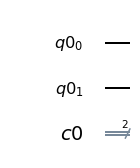

In [3]:
circuit = qk.QuantumCircuit(qr, cr)  # create our first circuit
circuit.draw(output='mpl')  # plot the circuit

In [4]:
# apply a Hadamard gate (|0> --> (|0>+|1>)sqrt(2)  &&  |1> --> (|0>-|1>)sqrt(2)) to our first qubit.
# Each time you run this cell, a new Hadamard gate is added.
circuit.h(qr[0])

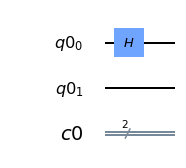

In [5]:
circuit.draw(output='mpl')

In [6]:
# add a ControlledNot gate to the circuit
circuit.cx(qr[0], qr[1])

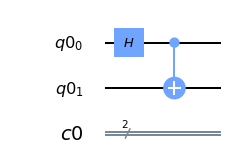

In [7]:
circuit.draw(output='mpl')

In [8]:
# create measurement
circuit.measure(qr, cr)

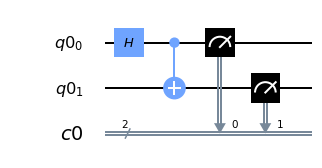

In [9]:
circuit.draw(output='mpl')

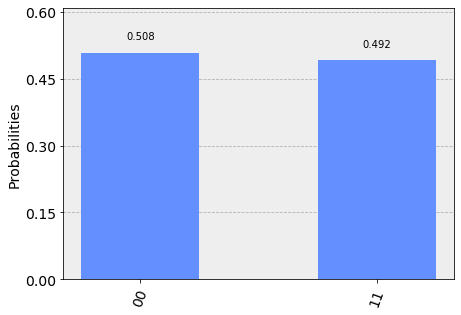

In [10]:
# create a quantum simulator
simulator = qk.Aer.get_backend('qasm_simulator')

# run the simulator
sim_result = qk.execute(circuit, backend=simulator).result()

# show result of simulation
plot_histogram(sim_result.get_counts())

In [11]:
# load IBMQ account
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
# run circuit in IBM's Quantum Computing
prov = IBMQ.get_provider('ibm-q')
qcomp = prov.get_backend('ibmq_essex')
job = qk.execute(circuit, backend=qcomp)

In [13]:
# see if job was executed
job_monitor(job)

Job Status: job has successfully run


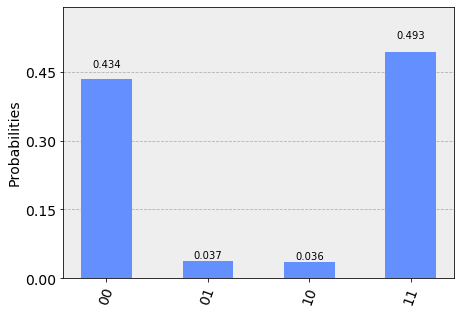

In [14]:
# see job results
result = job.result()
plot_histogram(result.get_counts())